<a href="https://colab.research.google.com/github/VietHoang319/Logistic/blob/main/BTL_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Thêm thư viện để kết nối colab với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Thêm thư viện
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#Lấy dữ liệu
data = pd.read_csv('/content/drive/My Drive/data_classification.csv')

In [ ]:
#x là 2 feature đầu
x = data.values[:,:2]

In [ ]:
#y là nhãn của dữ liệu
y = []
for i in data.values:
    y.append(i[2])
y = np.array(y)
y

array([0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [ ]:
F_class = np.array([x[i] for i in range(len(y)) if y[i] == 0])
P_class = np.array([x[i] for i in range(len(y)) if y[i] == 1])

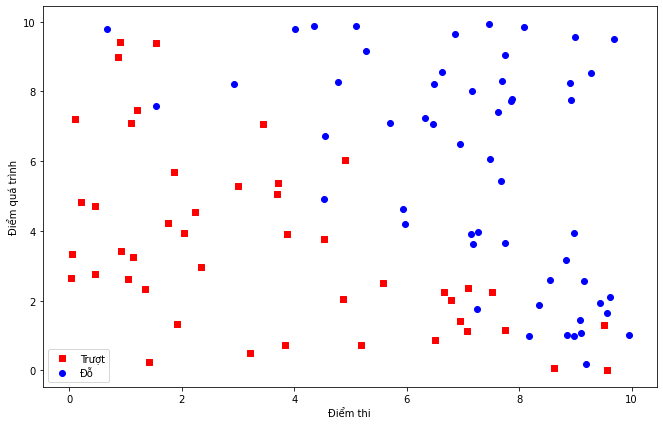

In [ ]:
plt.figure(figsize=(11, 7))
plt.scatter(F_class[:,0], F_class[:,1], marker = "s", color = 'red', label = "Trượt")
plt.scatter(P_class[:,0], P_class[:,1], marker = "o", color = 'blue', label = "Đỗ")
plt.xlabel('Điểm thi')
plt.ylabel('Điểm quá trình')
plt.legend()

In [ ]:
import sklearn.model_selection as model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.20, random_state = 101)

In [ ]:
#Khai báo hàm hồi quy logistic
model = LogisticRegression()

In [ ]:
#Cho 2 biến x và y vào model để train
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#In ra các tham số của phương trình
B = model.intercept_[0]
print('B:', B)
print('coefficients:', model.coef_)

B: -12.240729842147479
coefficients: [[1.34013681 1.10846564]]


In [ ]:
y_dudoan = model.predict(x_test)

In [ ]:
accuracy_score(y_dudoan, y_test)

0.95

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_dudoan))

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.94      1.00      0.97        15

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
y1 = model.predict(x)
F_class = np.array([x[i] for i in range(len(y)) if y1[i] == 0])
P_class = np.array([x[i] for i in range(len(y)) if y1[i] == 1])

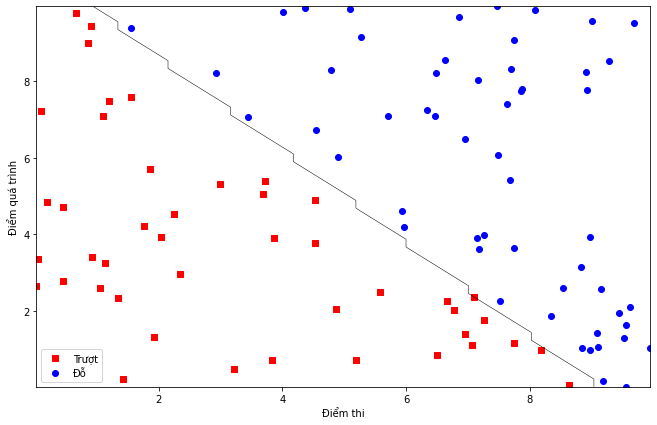

In [ ]:
plt.figure(figsize=(11, 7))
plt.scatter(F_class[:,0], F_class[:,1], marker = "s", color = 'red', label = "Trượt")
plt.scatter(P_class[:,0], P_class[:,1], marker = "o", color = 'blue', label = "Đỗ")
plt.xlabel('Điểm thi')
plt.ylabel('Điểm quá trình')
plt.legend()

x1_min, x1_max = x[:,0].min(), x[:,0].max(),  
x2_min, x2_max = x[:,1].min(), x[:,1].max(),  
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  
grid = np.c_[xx1.ravel(), xx2.ravel()]  
probs = model.predict(grid).reshape(xx1.shape)  
plt.contour(xx1, xx2, probs, [0.5], linewidths=0.5, colors='black')

In [ ]:
#dự đoán
print("Nhập điểm thi: ")
x = float(input())
print("Nhập điểm quá trình: ")
y = float(input())
#Hàm dự đoán
dd = model.predict([[x, y]])
print("Nhãn của dữ liệu vừa nhập là: ", dd)

if (dd == 1):
  print("=> Sinh viên này đỗ")
else:
  print("=> Sinh viên này trượt")

Nhập điểm thi: 
9
Nhập điểm quá trình: 
0
Nhãn của dữ liệu vừa nhập là:  [0.]
=> Sinh viên này trượt


# Mục mới